<a href="https://colab.research.google.com/github/Sujanthinim/DAS_analysis/blob/main/CKPLUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading the dataset from kaggle

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d gauravsharma99/ck48-5-emotions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 5.3 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=e701cfb70d71a97daead59e5ab540a607e989bb39d9a2ca0ca3cf465b2d51ddd
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
  0% 0.00/1.39M [00:00<?, ?B/s]
100% 1.39M/1.39M [00:00<00:00, 193MB/s]


unzipping the dataset and removing the zip file

In [ ]:
!unzip /content/ck48-5-emotions.zip
!rm /content/ck48-5-emotions.zip

Archive:  /content/ck48-5-emotions.zip
  inflating: CK+48/anger/S010_004_00000017.png  
  inflating: CK+48/anger/S010_004_00000018.png  
  inflating: CK+48/anger/S010_004_00000019.png  
  inflating: CK+48/anger/S011_004_00000019.png  
  inflating: CK+48/anger/S011_004_00000020.png  
  inflating: CK+48/anger/S011_004_00000021.png  
  inflating: CK+48/anger/S014_003_00000028.png  
  inflating: CK+48/anger/S014_003_00000029.png  
  inflating: CK+48/anger/S014_003_00000030.png  
  inflating: CK+48/anger/S022_005_00000030.png  
  inflating: CK+48/anger/S022_005_00000031.png  
  inflating: CK+48/anger/S022_005_00000032.png  
  inflating: CK+48/anger/S026_003_00000013.png  
  inflating: CK+48/anger/S026_003_00000014.png  
  inflating: CK+48/anger/S026_003_00000015.png  
  inflating: CK+48/anger/S028_001_00000022.png  
  inflating: CK+48/anger/S028_001_00000023.png  
  inflating: CK+48/anger/S028_001_00000024.png  
  inflating: CK+48/anger/S029_001_00000017.png  
  inflating: CK+48/anger/S029_

creating imagedatasetgenerator to see class imbalance and samlpe count

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SHAPE = (48, 48)
BATCH_SIZE = 64
train_dir = "/content/CK+48"
# test_dir =  "/content/test/"
train_datagen = ImageDataGenerator(rescale=1/255.,
rotation_range=0.1,
zoom_range=0.1,
validation_split=0.1)
# test_datagen = ImageDataGenerator(rescale=1/255.)
train_data = train_datagen.flow_from_directory(train_dir,
target_size=IMAGE_SHAPE,
batch_size=BATCH_SIZE,
subset="training",
class_mode="categorical",
shuffle=True)
test_data = train_datagen.flow_from_directory(train_dir,
target_size=IMAGE_SHAPE,
batch_size=BATCH_SIZE,
subset="validation",
class_mode="categorical")

Found 678 images belonging to 5 classes.
Found 72 images belonging to 5 classes.


printing class indices to see what index is alloted to which class

In [ ]:
print(train_data.class_indices)
print(train_data.class_indices)

{'anger': 0, 'fear': 1, 'happy': 2, 'sadness': 3, 'surprise': 4}
{'anger': 0, 'fear': 1, 'happy': 2, 'sadness': 3, 'surprise': 4}


plotting bar graph to see class counts for training data from image datset generator

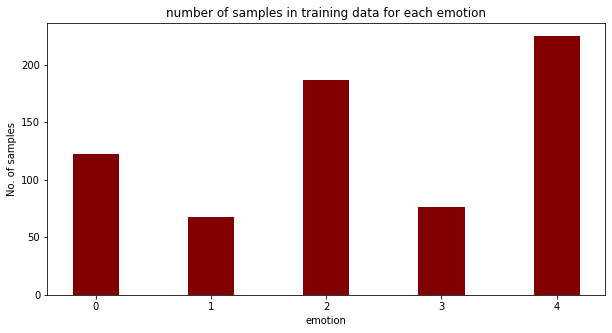

In [ ]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
# creating a list with the keys
items = Counter(train_data.classes)
# print(items)
emotions = list(items.keys())
values = list(items.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(emotions, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("emotion")
plt.ylabel("No. of samples")
plt.title("number of samples in training data for each emotion")
plt.show()

plotting bar graph to see class counts for testing data from image datset generator

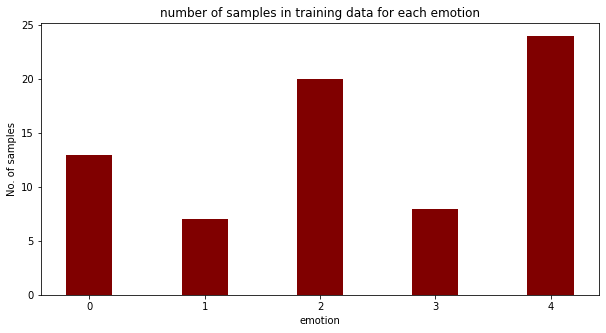

In [ ]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
# creating a list with the keys
items = Counter(test_data.classes)
# print(items)
emotions = list(items.keys())
values = list(items.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(emotions, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("emotion")
plt.ylabel("No. of samples")
plt.title("number of samples in training data for each emotion")
plt.show()

installing pytorch library with timm to use for transfer learning

In [ ]:
!pip install timm
!pip install torch
!pip install torchvision
!pip install pyyaml 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 431 kB 22.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


importing required libraries

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision as tv
from torchvision import datasets, models, transforms

import numpy as np
import matplotlib.pyplot as plt
from timm.data.mixup import Mixup
from timm.data.auto_augment import rand_augment_transform
import pandas as pd
import time
import os
import copy
import requests
import io

plt.ion()   # interactive mode

import timm

checking gpu for use in training

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


checking available ViT(vision transformers) models

In [ ]:
all_vit_models = timm.list_models('*vit*', pretrained=True)
all_vit_models

['convit_base',
 'convit_small',
 'convit_tiny',
 'crossvit_9_240',
 'crossvit_9_dagger_240',
 'crossvit_15_240',
 'crossvit_15_dagger_240',
 'crossvit_15_dagger_408',
 'crossvit_18_240',
 'crossvit_18_dagger_240',
 'crossvit_18_dagger_408',
 'crossvit_base_240',
 'crossvit_small_240',
 'crossvit_tiny_240',
 'levit_128',
 'levit_128s',
 'levit_192',
 'levit_256',
 'levit_384',
 'vit_base_patch8_224',
 'vit_base_patch8_224_in21k',
 'vit_base_patch16_224',
 'vit_base_patch16_224_in21k',
 'vit_base_patch16_224_miil',
 'vit_base_patch16_224_miil_in21k',
 'vit_base_patch16_384',
 'vit_base_patch16_sam_224',
 'vit_base_patch32_224',
 'vit_base_patch32_224_in21k',
 'vit_base_patch32_384',
 'vit_base_patch32_sam_224',
 'vit_base_r50_s16_224_in21k',
 'vit_base_r50_s16_384',
 'vit_huge_patch14_224_in21k',
 'vit_large_patch16_224',
 'vit_large_patch16_224_in21k',
 'vit_large_patch16_384',
 'vit_large_patch32_224_in21k',
 'vit_large_patch32_384',
 'vit_large_r50_s32_224',
 'vit_large_r50_s32_224_i

creating progress bar display

In [ ]:
from IPython.display import HTML, display

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

configuration for input data to ViT model

In [ ]:
# config 
input_size = 48, 48
img_size = 48
num_classes = 7
batch_size = 64

interpolation = 'bicubic'
IMAGENET_DEFAULT_MEAN  = (0.485, 0.456, 0.406)
IMAGENET_DEFAULT_STD = (0.229, 0.128, 0.225)
DEFAULT_CROP_PCT = 0.9

preparing dataset as pytorch dataset generator for training and validation datasets

In [ ]:
data_dir = "/content/CK+48"
data_transforms = transforms.Compose([
        transforms.RandomResizedCrop(img_size),
        transforms.RandomRotation(0.1),
        transforms.ToTensor(),
        tv.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

image_datasets = datasets.ImageFolder(data_dir, data_transforms)

dataset_sizes = len(image_datasets)
class_names = image_datasets.classes
print(dataset_sizes, class_names)

val_size = int(dataset_sizes*0.10)
train_dataset, val_dataset = torch.utils.data.random_split(image_datasets, [dataset_sizes-val_size, val_size], generator=torch.Generator().manual_seed(42))
train_len, val_len = len(image_datasets)-val_size, val_size
print(train_len, val_len)

loader_train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                             shuffle=True)
loader_val = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, 
                                          shuffle=False)

750 ['anger', 'fear', 'happy', 'sadness', 'surprise']
675 75


function to show sample dataset

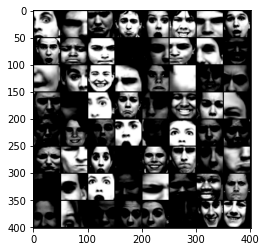

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    # inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(loader_train))

# Make a grid from batch
out = tv.utils.make_grid(inputs)

imshow(out)

evaluating function for evaluating the validation dataset after each epoch

In [ ]:
def eval_func(model, loader_val):
  model.eval()

  preds = []
  with torch.no_grad():
    for x, t in loader_val:
      x, t = x.to(device), t.to(device) # comment this line if use option1 dataloader
      logits = model(x)
      preds.append(torch.sum(torch.max(logits, dim=1)[1] == t))

  return sum(preds) / val_len

creating the transfer learning model by using our ViT model as base model and removing last layer and adding last layer for classification of our dataset

In [ ]:
model = timm.create_model('vit_base_r50_s16_224_in21k', pretrained=True, num_classes=num_classes, img_size=img_size)
# model = timm.create_model('vit_base_r50_s16_384', pretrained=True, num_classes=num_classes, img_size=img_size)
# model = timm.create_model('vit_tiny_patch16_128_in21k', pretrained=True, num_classes=num_classes, img_size=img_size)
model.to(device)

Removing representation layer for fine-tuning.


VisionTransformer(
  (patch_embed): HybridEmbed(
    (backbone): ResNetV2(
      (stem): Sequential(
        (conv): StdConv2dSame(3, 64, kernel_size=(7, 7), stride=(2, 2), bias=False)
        (norm): GroupNormAct(
          32, 64, eps=1e-05, affine=True
          (act): ReLU(inplace=True)
        )
        (pool): MaxPool2dSame(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False)
      )
      (stages): Sequential(
        (0): ResNetStage(
          (blocks): Sequential(
            (0): Bottleneck(
              (downsample): DownsampleConv(
                (conv): StdConv2dSame(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (norm): GroupNormAct(
                  32, 256, eps=1e-05, affine=True
                  (act): Identity()
                )
              )
              (conv1): StdConv2dSame(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (norm1): GroupNormAct(
                32, 64, eps=1e-05, 

adding weight decay

In [ ]:
def add_weight_decay(model, weight_decay=1e-5, skip_list=()):
    decay = []
    no_decay = []
    for name, param in model.named_parameters():
        if not param.requires_grad:
            continue  # frozen weights
        if len(param.shape) == 1 or name.endswith(".bias") or name in skip_list:
            no_decay.append(param)
        else:
            decay.append(param)
    return [
        {'params': no_decay, 'weight_decay': 0.},
        {'params': decay, 'weight_decay': weight_decay}]

# weight_decay
skip = {}
if hasattr(model, 'no_weight_decay'):
    skip = model.no_weight_decay()
parameters = add_weight_decay(model, 0.0001, skip)
weight_decay = 0.

# optimizer = optim.SGD(parameters, momentum=0.9, nesterov=True, lr=0.01, weight_decay=weight_decay)
optimizer = optim.Adam(parameters,lr=3e-4)

adding loss function

In [ ]:
from timm.loss import LabelSmoothingCrossEntropy
loss_fn = LabelSmoothingCrossEntropy(smoothing=0.1).cuda()

adding scheduler for learning rate

In [ ]:
from timm.scheduler import StepLRScheduler
# setup learning rate schedule and starting epoch
start_epoch = 0

num_epochs = 10

noise_range = None
lr_scheduler = StepLRScheduler(optimizer, decay_t=30, decay_rate=0.1,
               warmup_lr_init=0.00001, warmup_t=3, noise_range_t=None, noise_pct=0.67,
               noise_std=1., noise_seed=42)

training our ViT model

In [ ]:
iters = 50

pb_train = display(progress(0, iters), display_id=True)
losses = [[]]
accus_train = [[]]
accus_val = []

for i in range(iters):
  for x, t in loader_train:
    x, t = x.to(device), t.to(device) # comment this line if use option1 dataloader
    # print(x.shape)
    logits = model(x)
    # print(logits.mean())
    loss = loss_fn(logits, t)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    losses[-1].append(loss.item())

    with torch.no_grad():
      accus_train[-1].append(torch.sum(torch.max(logits, dim=1)[1] == t))
      #print(torch.max(logits, dim=1)[1])
    # break

  losses[-1] = sum(losses[-1])
  losses.append([])
  accus_train[-1] = sum(accus_train[-1]) / train_len
  accus_train.append([])

  # step LR for next epoch
  lr_scheduler.step(i + 1)

  accus_val.append(eval_func(model, loader_val))
  model.train()

  pb_train.update(progress(i, iters))
  print(f'\r[Step {i+1}] loss={loss:.2e} '
        f'\r[Step {i+1}] loss={losses[-2]:.2e} '
        f'train accu={accus_train[-2]:.2%} '
        f'validation accu={accus_val[-1]:.2%} '
        # , end=''
        , flush=True)
  # break

[Step 1] loss=1.71e+01 train accu=39.73% validation accu=57.33% 
[Step 2] loss=1.42e+01 train accu=53.73% validation accu=74.67% 
[Step 3] loss=1.06e+01 train accu=67.73% validation accu=72.00% 
[Step 4] loss=1.03e+01 train accu=68.93% validation accu=82.67% 
[Step 5] loss=9.24e+00 train accu=74.67% validation accu=84.00% 
[Step 6] loss=9.71e+00 train accu=70.93% validation accu=81.33% 
[Step 7] loss=8.52e+00 train accu=76.80% validation accu=74.67% 
[Step 8] loss=8.24e+00 train accu=77.20% validation accu=78.67% 
[Step 9] loss=7.93e+00 train accu=79.33% validation accu=88.00% 
[Step 10] loss=8.32e+00 train accu=77.07% validation accu=86.67% 
[Step 11] loss=7.47e+00 train accu=80.00% validation accu=86.67% 
[Step 12] loss=7.34e+00 train accu=80.00% validation accu=90.67% 
[Step 13] loss=7.22e+00 train accu=80.67% validation accu=92.00% 
[Step 14] loss=7.28e+00 train accu=81.33% validation accu=88.00% 
[Step 15] loss=7.32e+00 train accu=81.47% validation accu=93.33% 
[Step 16] loss=7.10

saving our model

In [ ]:
save_path = "CKPLUS.pth"
torch.save(model, save_path)

loading our model

In [ ]:
model = torch.load("CKPLUS.pth")
model.to(device)

VisionTransformer(
  (patch_embed): HybridEmbed(
    (backbone): ResNetV2(
      (stem): Sequential(
        (conv): StdConv2dSame(3, 64, kernel_size=(7, 7), stride=(2, 2), bias=False)
        (norm): GroupNormAct(
          32, 64, eps=1e-05, affine=True
          (act): ReLU(inplace=True)
        )
        (pool): MaxPool2dSame(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False)
      )
      (stages): Sequential(
        (0): ResNetStage(
          (blocks): Sequential(
            (0): Bottleneck(
              (downsample): DownsampleConv(
                (conv): StdConv2dSame(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (norm): GroupNormAct(
                  32, 256, eps=1e-05, affine=True
                  (act): Identity()
                )
              )
              (conv1): StdConv2dSame(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (norm1): GroupNormAct(
                32, 64, eps=1e-05, 

evaluating our model on validation dataset

In [ ]:
model.eval()
preds = []
preds2 = []
target = []
with torch.no_grad():
  for x, t in loader_val:
    x, t = x.to(device), t.to(device)
    logits = model(x)
    preds.append(torch.sum(torch.max(logits, dim=1)[1] == t))
    logits = logits.cpu().detach().numpy()
    t = t.cpu().detach().numpy()
    for i in logits:
      preds2.append(np.argmax(i))
    for i in t:
      target.append(i)
print(preds)
preds2 = np.array(preds2)
# preds2 = np.vstack(preds2)
target = np.array(target)
# target = np.vstack(target)
print(preds2)
print(target)
print(sum(preds).cpu().numpy() / val_len)

[tensor(62, device='cuda:0'), tensor(11, device='cuda:0')]
[0 3 4 0 4 4 2 2 4 3 4 4 4 4 4 1 0 4 4 0 4 2 2 3 1 4 0 1 2 2 2 4 4 0 4 2 4
 0 1 0 1 1 3 2 2 2 2 2 2 2 3 3 0 0 2 0 4 1 0 2 2 4 0 0 0 0 2 4 2 3 3 4 4 2
 4]
[0 3 4 0 4 4 2 2 4 3 4 4 4 4 4 1 0 4 4 0 4 2 2 3 1 4 0 1 2 2 2 4 4 0 4 2 4
 0 1 0 1 1 3 2 2 2 2 2 2 2 3 3 0 3 4 0 4 1 0 2 2 4 0 0 0 0 2 4 2 3 3 4 4 2
 4]
0.9733333333333334


getting all metrics results

accuracy: 0.9733333333333334
Confusion Matrix
[[15  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0 20  0  0]
 [ 1  0  0  8  0]
 [ 0  0  1  0 23]]
              precision    recall  f1-score   support

       anger       0.94      1.00      0.97        15
        fear       1.00      1.00      1.00         7
       happy       0.95      1.00      0.98        20
     sadness       1.00      0.89      0.94         9
    surprise       1.00      0.96      0.98        24

    accuracy                           0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75

   class  sensitivity  specificity
0      0     0.983333          1.0
1      1     1.000000          1.0
(5, 5)
ROC AUC score: 0.9812373737373739


<Figure size 432x288 with 0 Axes>

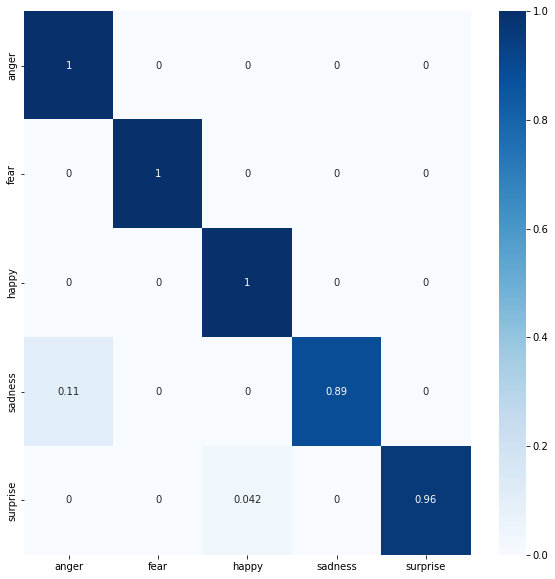

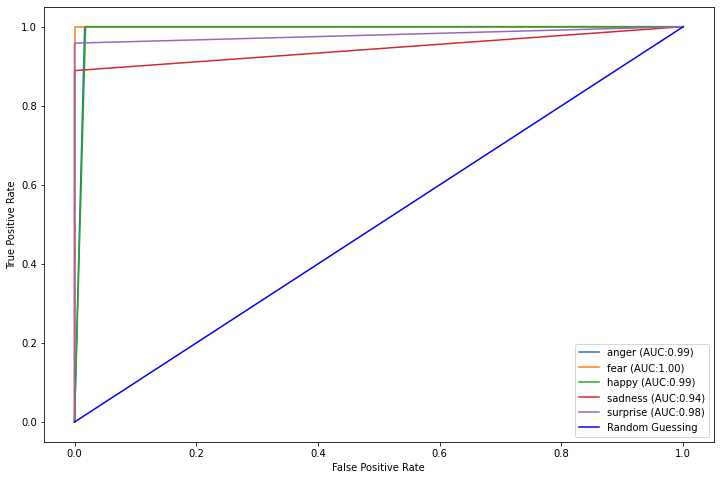

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
import seaborn as sns
import numpy as np
import os
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
y_pred = preds2
true_classes = target
class_labels = class_names
print(f'accuracy:',sum(preds).cpu().numpy() / val_len)
print('Confusion Matrix')
k1 = confusion_matrix(true_classes, y_pred)
print(k1)
report = classification_report(true_classes, y_pred, target_names=class_labels, output_dict=True)
report1 = classification_report(true_classes, y_pred, target_names=class_labels)
print(report1)
res = []
for l in range(2):
    prec,recall,_,_ = precision_recall_fscore_support(np.array(true_classes)==l,
                                                      np.array(y_pred)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])
print(pd.DataFrame(res,columns = ['class','sensitivity','specificity']))
kk1 = []
try:
  for i in report:
    kk1.append(report[i]["support"])
except:
  pass
kk1 = np.array(kk1)
print(np.shape(k1))
cmn = k1.astype('float') / k1.sum(axis=1)[:, np.newaxis]
plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
sns_plot = sns.heatmap(cmn, annot=True, cmap='Blues',xticklabels = class_labels, yticklabels = class_labels)
fig1 = sns_plot.get_figure()
target= class_labels
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    # print(np.shape(y_test))
    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(true_classes, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

vanilla CNN for comparison

In [ ]:
# Hyper parameters
num_epochs = 50
num_classes = 7
batch_size = 64
learning_rate = 0.002

defining cnn class

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(1296, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 7)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# net = Net()

initializing cnn

In [ ]:
model = Net().to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)

training the cnn

In [ ]:
iters = 50

pb_train = display(progress(0, iters), display_id=True)
losses = [[]]
accus_train = [[]]
accus_val = []

for i in range(iters):
  for x, t in loader_train:
    x, t = x.to(device), t.to(device) # comment this line if use option1 dataloader
    # print(x.shape)
    logits = model(x)
    # print(logits.mean())
    loss = criterion(logits, t)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    losses[-1].append(loss.item())

    with torch.no_grad():
      accus_train[-1].append(torch.sum(torch.max(logits, dim=1)[1] == t))
      #print(torch.max(logits, dim=1)[1])
    # break

  losses[-1] = sum(losses[-1])
  losses.append([])
  accus_train[-1] = sum(accus_train[-1]) / train_len
  accus_train.append([])

  # step LR for next epoch
  # lr_scheduler.step(i + 1)

  accus_val.append(eval_func(model, loader_val))
  model.train()

  pb_train.update(progress(i, iters))
  print(f'\r[Step {i+1}] loss={loss:.2e} '
        f'\r[Step {i+1}] loss={losses[-2]:.2e} '
        f'train accu={accus_train[-2]:.2%} '
        f'validation accu={accus_val[-1]:.2%} '
        # , end=''
        , flush=True)
  # break

[Step 1] loss=1.12e+01 train accu=61.04% validation accu=57.33% 
[Step 2] loss=1.13e+01 train accu=60.30% validation accu=60.00% 
[Step 3] loss=1.13e+01 train accu=61.04% validation accu=50.67% 
[Step 4] loss=1.18e+01 train accu=57.78% validation accu=58.67% 
[Step 5] loss=1.14e+01 train accu=61.93% validation accu=62.67% 
[Step 6] loss=1.09e+01 train accu=62.37% validation accu=65.33% 
[Step 7] loss=1.08e+01 train accu=62.96% validation accu=53.33% 
[Step 8] loss=1.08e+01 train accu=60.89% validation accu=64.00% 
[Step 9] loss=1.11e+01 train accu=61.48% validation accu=60.00% 
[Step 10] loss=1.03e+01 train accu=64.59% validation accu=64.00% 
[Step 11] loss=1.07e+01 train accu=60.15% validation accu=58.67% 
[Step 12] loss=1.05e+01 train accu=61.48% validation accu=74.67% 
[Step 13] loss=1.03e+01 train accu=63.56% validation accu=61.33% 
[Step 14] loss=1.09e+01 train accu=61.78% validation accu=58.67% 
[Step 15] loss=1.07e+01 train accu=63.26% validation accu=65.33% 
[Step 16] loss=1.02

saving our model

In [ ]:
save_path = "CNN.pth"
torch.save(model, save_path)

loading our model

In [ ]:
model = torch.load("CNN.pth")
model.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1296, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=7, bias=True)
)

evaluating our model on validation dataset

In [ ]:
model.eval()
preds = []
preds2 = []
target = []
with torch.no_grad():
  for x, t in loader_val:
    x, t = x.to(device), t.to(device)
    logits = model(x)
    preds.append(torch.sum(torch.max(logits, dim=1)[1] == t))
    logits = logits.cpu().detach().numpy()
    t = t.cpu().detach().numpy()
    for i in logits:
      preds2.append(np.argmax(i))
    for i in t:
      target.append(i)
print(preds)
preds2 = np.array(preds2)
# preds2 = np.vstack(preds2)
target = np.array(target)
# target = np.vstack(target)
print(preds2)
print(target)
print(sum(preds).cpu().numpy() / val_len)

[tensor(40, device='cuda:0'), tensor(10, device='cuda:0')]
[2 1 4 0 4 4 2 4 4 0 4 4 3 4 0 1 0 4 2 4 4 2 4 4 2 4 4 3 2 4 2 4 4 4 4 2 4
 0 1 0 4 4 0 2 2 2 2 2 2 2 3 3 0 0 4 2 4 1 2 2 2 2 4 2 0 0 2 4 2 2 3 4 4 2
 4]
[0 3 4 0 4 4 2 2 4 3 4 4 4 4 4 1 0 4 4 0 4 2 2 3 1 4 0 1 2 2 2 4 4 0 4 2 4
 0 1 0 1 1 3 2 2 2 2 2 2 2 3 3 0 3 4 0 4 1 0 2 2 4 0 0 0 0 2 4 2 3 3 4 4 2
 4]
0.6666666666666666


getting all metrics results

accuracy: 0.6666666666666666
Confusion Matrix
[[ 7  0  4  0  4]
 [ 0  3  1  1  2]
 [ 0  0 17  0  3]
 [ 3  1  1  3  1]
 [ 1  0  2  1 20]]
              precision    recall  f1-score   support

       anger       0.64      0.47      0.54        15
        fear       0.75      0.43      0.55         7
       happy       0.68      0.85      0.76        20
     sadness       0.60      0.33      0.43         9
    surprise       0.67      0.83      0.74        24

    accuracy                           0.67        75
   macro avg       0.67      0.58      0.60        75
weighted avg       0.66      0.67      0.65        75

   class  sensitivity  specificity
0      0     0.933333     0.466667
1      1     0.985294     0.428571
(5, 5)
ROC AUC score: 0.745869620575503


<Figure size 432x288 with 0 Axes>

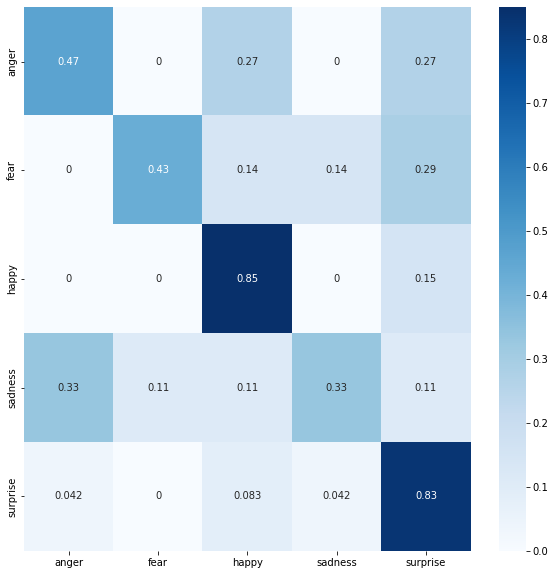

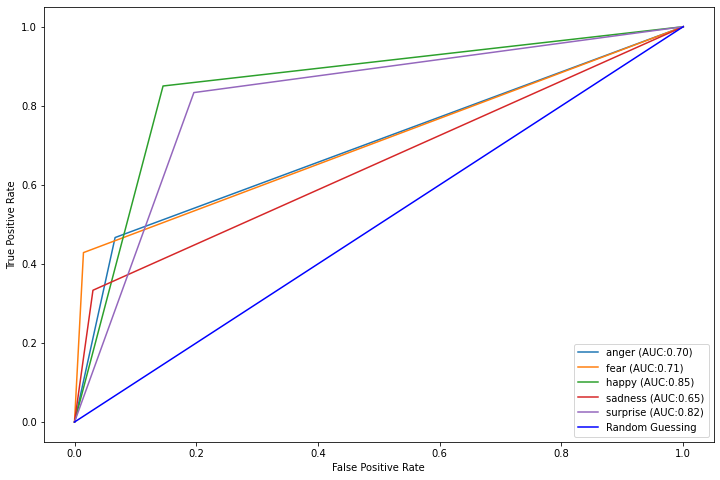

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
import seaborn as sns
import numpy as np
import os
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
y_pred = preds2
true_classes = target
class_labels = class_names
print(f'accuracy:',sum(preds).cpu().numpy() / val_len)
print('Confusion Matrix')
k1 = confusion_matrix(true_classes, y_pred)
print(k1)
report = classification_report(true_classes, y_pred, target_names=class_labels, output_dict=True)
report1 = classification_report(true_classes, y_pred, target_names=class_labels)
print(report1)
res = []
for l in range(2):
    prec,recall,_,_ = precision_recall_fscore_support(np.array(true_classes)==l,
                                                      np.array(y_pred)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])
print(pd.DataFrame(res,columns = ['class','sensitivity','specificity']))
kk1 = []
try:
  for i in report:
    kk1.append(report[i]["support"])
except:
  pass
kk1 = np.array(kk1)
print(np.shape(k1))
cmn = k1.astype('float') / k1.sum(axis=1)[:, np.newaxis]
plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
sns_plot = sns.heatmap(cmn, annot=True, cmap='Blues',xticklabels = class_labels, yticklabels = class_labels)
fig1 = sns_plot.get_figure()
target= class_labels
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    # print(np.shape(y_test))
    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(true_classes, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()